## Data Visualization Challenge

We will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
# import the file(s)
df = pd.read_csv('results.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [3]:
# filter dataset to only fifa world cup matches
fifa = df[df['tournament'] == 'FIFA World Cup']
fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


In [59]:
## Given that goals are in both home_score and away_score, we need to merge the two using their name
fifa_home = fifa.loc[:, ['home_team', 'home_score']].rename(columns = {'home_team':'country', 'home_score':'home_score'}).groupby('country').count()
fifa_away = fifa.loc[:, ['away_team', 'away_score']].rename(columns = {'away_team':'country', 'away_score':'away_score'}).groupby('country').count()

# Merge the columns together and fill in the missing values with zero (because we are aggregating)
fifa_total = pd.merge(fifa_away, fifa_home, on='country', how='left').fillna(0)

fifa_total['total_score'] = fifa_total['away_score']  + fifa_total['home_score']

fifa_total = fifa_total.astype(int).sort_values('total_score', ascending=False)

# At this stage, country is the index, reset it to numerical index
fifa_total = fifa_total.reset_index()

fifa_total

,country,away_score,home_score,total_score
0,Brazil,25,84,109
1,Germany,32,77,109
2,Italy,34,49,83
3,Argentina,21,60,81
4,England,33,36,69
...,...,...,...,...
74,Iraq,2,1,3
75,Panama,2,1,3
76,Angola,2,1,3
77,Jamaica,2,1,3


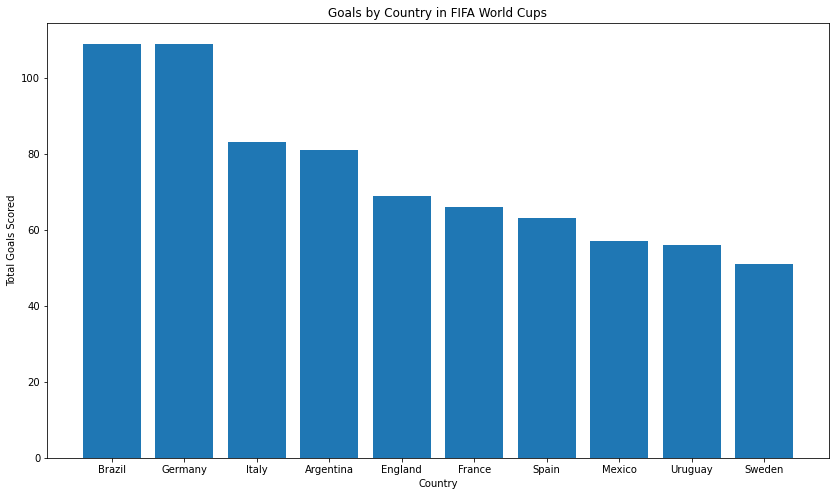

In [58]:
# Plot top 10
fifa_total = fifa_total.head(10)

fig,ax = plt.subplots(figsize=(14,8))
ax.bar(fifa_total['country'], fifa_total['total_score'])

ax.set_xlabel('Country')
ax.set_ylabel('Total Goals Scored')
ax.set_title('Goals by Country in FIFA World Cups')

plt.show();

## Task
What is the number of matches played in each tournament throughout history?

In [6]:
tournament = df['tournament'].value_counts().to_frame('number of matches').reset_index().sort_values('number of matches', ascending=False)
tournament = tournament.rename(columns={"index": "tournament"})
tournament = tournament.head(10)
tournament

,tournament,number of matches
0,Friendly,17029
1,FIFA World Cup qualification,7236
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1672
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


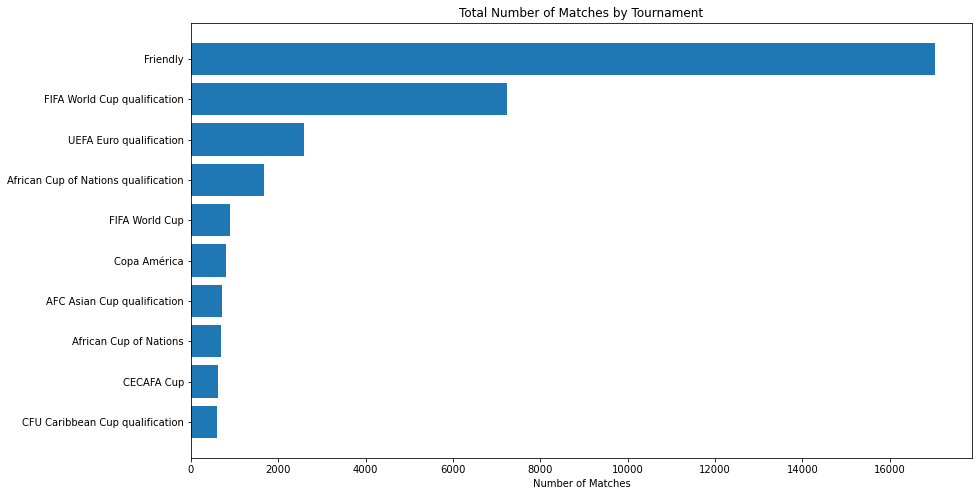

In [7]:
# Plot
fig,ax = plt.subplots(figsize=(14,8))
ax.barh(tournament['tournament'], tournament['number of matches'])
ax.invert_yaxis()

ax.set_xlabel('Number of Matches')
# ax.set_ylabel('Tournament')
ax.set_title('Total Number of Matches by Tournament')

plt.show();

## Task 
Show the trend in number of matches per year.

In [8]:
df['years'] = pd.DatetimeIndex(df['date']).year
df_year = df.loc[:, ['years', 'date']].groupby('years').count()

# Drop Year 2020 as the data is incomplete and would mess the graph up
df_year = df_year.drop(labels=2020, axis=0)
df_year.sort_values('date', ascending=False).sample(5)


,date
years,
1964,186
1888,7
1891,6
1917,24
1936,83


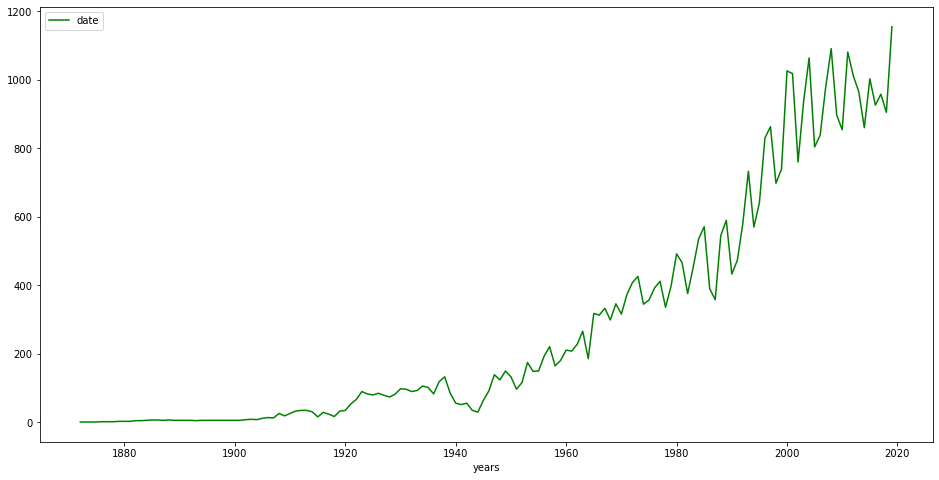

In [9]:
# plot
df_year.plot(figsize=(16,8), color='green');

## Task
Which teams are the most successful ones? (winning percentage)

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [10]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [11]:
match_month = df.groupby('month').size()

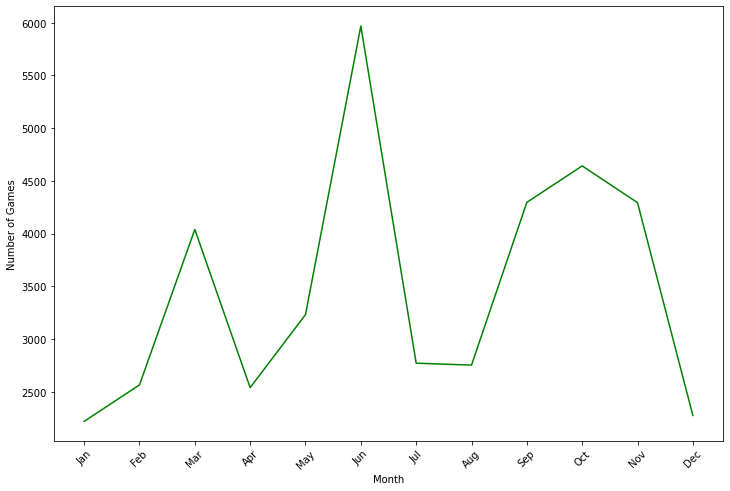

In [12]:
fig, ax = plt.subplots(figsize = (12,8))


ax.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'], match_month.tolist(), color='green')
ax.set_ylabel('Number of Games')
ax.set_xlabel('Month')
plt.xticks(rotation=45)
plt.show()

## Task
Which teams played against each other the most?

In [47]:
def rivals(row):
    rivals = sorted([row['home_team'], row['away_team']])
    return str(rivals)
df['rivals'] = df.apply(rivals, axis=1)

In [48]:
rivals = df.groupby('rivals').size()
rivals = rivals.sort_values(ascending=False).head(10)
rivals = rivals.reset_index()
rivals = pd.DataFrame(rivals)
rivals = rivals.rename(columns={0: "Games played"})
rivals

,rivals,Games played
0,"['Argentina', 'Uruguay']",176
1,"['Austria', 'Hungary']",133
2,"['Belgium', 'Netherlands']",125
3,"['England', 'Scotland']",116
4,"['Kenya', 'Uganda']",107
5,"['Norway', 'Sweden']",107
6,"['Scotland', 'Wales']",106
7,"['Denmark', 'Sweden']",106
8,"['Argentina', 'Brazil']",104
9,"['England', 'Wales']",103


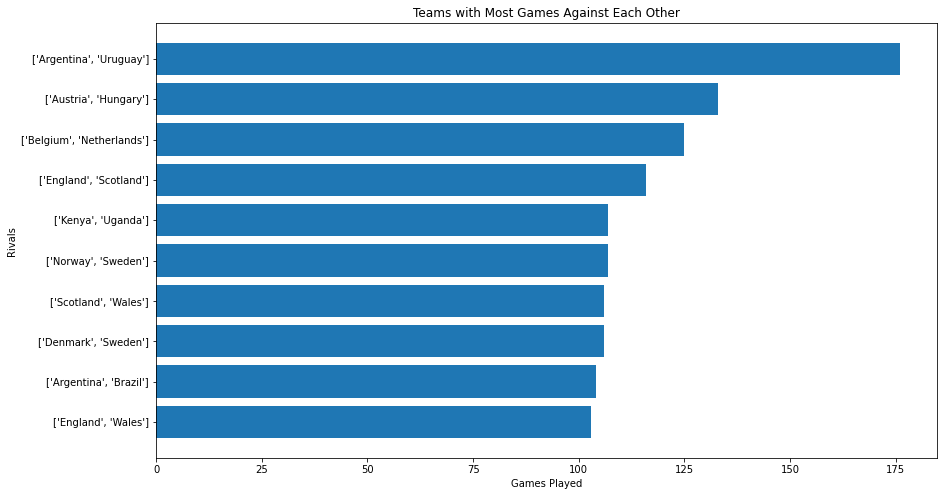

In [49]:
fig, ax = plt.subplots(figsize = (14,8))

# bar graph
ax.barh(rivals['rivals'], rivals['Games played'])
ax.invert_yaxis()

ax.set_xlabel('Games Played')
ax.set_ylabel('Rivals')
ax.set_title('Teams with Most Games Against Each Other')


plt.show()